# Ejercicios de Regresión y Filtrado de Datos

Este cuaderno contiene ejercicios relacionados con el conjunto de datos de viajes en taxi (`taxi_trip_pricing.csv`).

Se abordarán los siguientes temas:
1. **Regresión Lineal Simple** (Distance vs. Fare Amount)
2. **Filtrado de Datos** para casos de condiciones de tráfico y clima.
3. **Interpretación** de resultados de la regresión.
4. **Imputación de Datos**: Reflexiones y prácticas adicionales.

---

## 1. Preparación del Entorno
En primer lugar, debemos **cargar** las librerías necesarias y **leer** el archivo `taxi_trip_pricing.csv`.

### Tareas de este apartado:
- Instalar o importar **pandas**, **numpy**, **matplotlib** y (opcionalmente) **seaborn**.
- Leer el CSV, guardarlo en un DataFrame `data`.
- Revisar si hay valores nulos y, si lo deseas, imputarlos (por ejemplo, usando la moda o la media, según corresponda).

Rellena la siguiente celda con tu código.

In [ ]:
# Sugerencia:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data  
data=pd.read_csv("taxi_trip_pricing.csv")

# Comprobar la forma y valores nulos.
data.info()
# Codigo para comprobar la forma y valores nulos
data.isna().sum()

# Imputación 

# Codigo para imputación 
for column in data.columns:
    mode_value = data[column].mode()[0]  
    data[column].fillna(mode_value, inplace=True)
    
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Bas

C:\Users\0272513\AppData\Local\Temp\ipykernel_16616\1382224693.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


## 2. Regresión Lineal Simple: Distancia vs. Costo

**Objetivo**: Ajustar un **modelo lineal** del tipo 
**Fare Amount** = a + b (**Distance**).

### Pasos sugeridos:
1. Selecciona las columnas **`Distance`** y **`Fare Amount`** de `data`.
2. Realiza un **scatter plot** para visualizar la relación.
3. Usa un método de **regresión lineal**(sin librerias) para obtener los parámetros \(a\) y \(b\).
4. Imprime los resultados y **discute**:
   - ¿Qué significa la pendiente \(b\) en el contexto del precio? La pendiente significa la relación existen entre la distancia y el precio del viaje (b).
   - ¿Qué representa \(a\)? (el intercepto) Por otro lado el intercepto (a), significa el valor del precio cuando la distancia es 0.
   


Rellena el siguiente bloque con tu implementación.

In [18]:
# Sugerencia con numpy:
x = data["Trip_Distance_km"].values
y = data["Trip_Price"].values

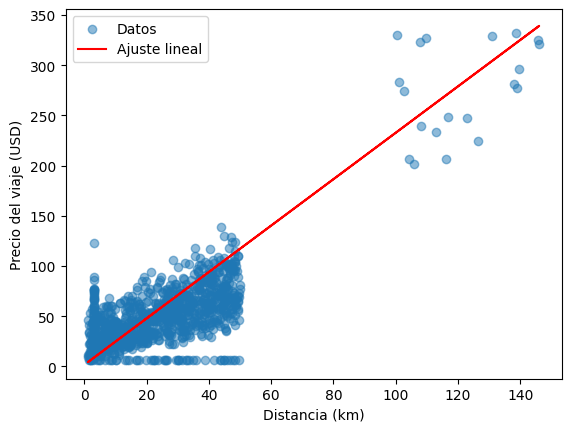

In [43]:
# Visualización con scatter plot.
plt.scatter(x, y, alpha=0.5, label="Datos")
plt.plot(x, 1.58 + 2.3105*x, color='red', label="Ajuste lineal")
plt.legend()
plt.xlabel("Distancia (km)")
plt.ylabel("Precio del viaje (USD)")
plt.show()


### ¿Qué puedes decir de la gráfica?

### Regresión con librerias

In [30]:

# Con sklearn:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
print("Intercepto:", model.intercept_)
print("Pendiente:", model.coef_[0])


ModuleNotFoundError: No module named 'sklearn'

## Preguntas de Interpretación
1. **¿Cuál es la pendiente** y cómo la interpretas en términos de dólares por kilómetro?
2. **¿Crees que sea razonable** para viajes muy cortos (cercanos a 0 km)? ¿Qué podría implicar el intercepto?
3. **¿Son realistas** estos parámetros para todo el rango de distancias, o crees que en trayectos muy largos se requeriría un modelo distinto?
4. Con base en tu experiencia con taxis, ¿dónde fallaría el modelo lineal?

Reflexiona brevemente y, si deseas, anota tus comentarios en la siguiente celda.

## 3. Filtrar Datos por Tráfico y Condiciones Climáticas
A veces, los precios dependen no solo de la distancia, sino también de **variables categóricas** como **`Traffic Condition`** o **`Weather Condition`**.

### Ejercicio:
1. Filtra los datos **cuando el tráfico sea intenso**.
2. Realiza **otra** regresión lineal (Distance vs. Fare Amount) **usando solo** los datos filtrados.
3. Compara la **pendiente** con la situación general. ¿Sube o baja el precio por km bajo tráfico intenso?
4. Haz algo similar con una condición climática (por ejemplo, `'Weather Condition' == 'lluvia'`).

Completa la celda siguiente con tu código y análisis.

In [ ]:
# Filtrar datos y realizar regresiones adicionales.

# data_intenso = data[data['Traffic Condition'] == 'intenso']
# ... 
# Aplica un scatter

# data_lluvia = data[data['Weather Condition'] == 'lluvia']
# ...


## Interpretación Adicional
1. **¿Cómo cambia** la pendiente (costo por km) cuando se filtra por tráfico bajo?
2. **¿El intercepto** varía significativamente?
3. **¿Crees** que haya interacción con la hora del día o con la duración del viaje?

Puedes anotar tus ideas aquí.

#  Anota conclusiones personales
## (Escribe tu análisis)


## 4. (Opcional) Proponer Variable de Consumo de Combustible
Imagina que, además de la **tarifa** del viaje, se registra un **Consumo de Combustible** (Fuel Consumption) en litros por viaje. ¿Cómo podríamos relacionar esa variable con:
1. **Distance** (podría ser lineal, exponencial o potencia, dependiendo del estilo de conducción, tráfico, etc.)
2. **Trip Duration**
3. **Traffic Condition** (en tráfico intenso, quizás el consumo sea más alto por el ralentí prolongado y arranques frecuentes)

### Preguntas:
- Si **Fuel Consumption** creciera de forma **no lineal** con la distancia (por ejemplo, aumenta más que proporcionalmente en tráfico denso), ¿qué tipo de modelo usarías?
- ¿Te parece más **exponencial** o **potencial**? ¿Por qué?

Escribe tus reflexiones aquí.

# Reflexiona sobre variable "Fuel Consumption"


## 5. Ejercicios de Imputación y Regresión
Para afianzar la **imputación de datos**:
1. Elimina algunos valores de `Fare Amount` o de `Distance` (por ejemplo, 5% aleatorio).
2. Imputa esos valores usando la **moda** o la **media**.
3. Compara la **pendiente** y **error** de la regresión antes y después de la imputación.

### Preguntas:
- ¿Se alteran los coeficientes de la regresión?
- ¿Sería mejor descartar esas filas incompletas o imputarlas?
- ¿Qué estrategia de imputación genera menos distorsión?

Completa el siguiente bloque con tu experimento.

In [ ]:
# Ejemplo de "romper" datos, imputar y volver a hacer la regresión.
# Sugerencia:
import random
indices = random.sample(range(len(data)), int(len(data)*0.05))
for i in indices:
    data.at[i, 'Fare Amount'] = np.nan

# # Imputar (p.ej. con la media) de 'Fare Amount':


# # Realizar la misma regresión y comparar.


## Conclusiones Generales
En este cuaderno se practicó:
- La **regresión lineal** en un escenario simplificado (Distance vs. Fare).
- El **filtrado** de datos (tráfico intenso, clima lluvioso).
- **Reflexiones** sobre el **consumo de combustible** como variable adicional de posible relación no lineal.
- Un ejercicio opcional de **imputación** de datos para ver cómo afecta a la regresión.

La clave es **interpretar** los resultados y las **limitaciones** de cada modelo y cada estrategia de imputación.